# Cancerous Skin Legion Image Classification
Dataset files:

HAM10000_metadata.csv - Stores information regarding the individual and points to an image

hmnist_28_28_L.csv -Stores the 28 x 28 greyscale pixel values for each image.

hmnist_28_28_RGB.csv -Stores the RGB values of each pixel.

This dataset is comprised of 10015 images of pigmented skin lesions ,in which each lesion is diagnosed to be one of the 7 main diagnosis groups for skin cancer,which are listed below :


It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi :nv
2. Melanoma :mel
3. Benign keratosis-like lesions :bkl
4. Basal cell carcinoma :bcc
5. Actinic keratoses :akiec
6. Vascular lesions :vasc
7. Dermatofibroma:df

The metadata for each image includes:

Diagnosis confirmation type (method in which the individual was diagnosed): histopathology (histo), 
follow-up examination (follow_up), expert consensus (consensus), or in-vivo confocal microscopy (confocal)
Age of the individual (ranging from 0 to 85 years old)
Sex of the individual (Male,Female, or 'unknown')
Location of the skin lesion on the body: the dataset uses 14 distinct localizations (i.e. face, neck, lower extremity, etc.)

In this kernel I will try to detect 7 different classes of skin cancer using Convolution Neural Network with fastai 
library and then analyse the result to see how the model can be useful.
We will move step by step process to classify 7 classes of cancer.

In this kernel I have followed following 11 steps for model building and evaluation which are as follows : 

1. Importing Essential Libraries
2. Making Dictionary of images and labels 
3. Reading and Processing Data 
4. Data Cleaning 
5. Exploratory data analysis (EDA)
6. Loading & Resizing of images 
7. Train Test Split
8. Normalization
9. Model Building (CNN)
10. Fitting the model
11. Model Evaluation (Testing and validation accuracy, confusion matrix, analysis of misclassified instances)


In [87]:
# Importing all the necessary packages
import os
import itertools
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the fastai library 
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.metrics import accuracy

In [3]:
import tensorflow
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
os.chdir('D:/Ritika Agarwal/Hackathons/Kaggle/input')

In [7]:
os.listdir()

['base_dir',
 'HAM10000_images_part_1',
 'HAM10000_images_part_1.zip',
 'HAM10000_images_part_2',
 'HAM10000_images_part_2.zip',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv']

In [56]:
df=pd.read_csv('D:/Ritika Agarwal/Hackathons/Kaggle/input/HAM10000_metadata.csv').set_index('image_id')
df.head()

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [57]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [58]:
lesion_type_dict = {
    'nv': 'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis ',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

In [59]:
df['dx']=df['dx'].astype('category',copy=True)

In [60]:
 # Convert the labels to numbers
df['labels']=df['dx'].cat.codes

In [61]:
df['labels'].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: labels, dtype: int64

In [62]:
df['lesion']= df['dx'].map(lesion_type_dict)
df.head()

,lesion_id,dx,dx_type,age,sex,localization,labels,lesion
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign Keratosis
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign Keratosis
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign Keratosis
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign Keratosis
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign Keratosis


In [63]:
# Checking Missing values of each fields
df.isnull().sum()

lesion_id        0
dx               0
dx_type          0
age             57
sex              0
localization     0
labels           0
lesion           0
dtype: int64

In [64]:
# Fill the null values by their mean
df['age'].fillna((df['age'].mean()), inplace=True)

In [65]:
# Checking Missing values of each fields
df.isnull().sum()

lesion_id       0
dx              0
dx_type         0
age             0
sex             0
localization    0
labels          0
lesion          0
dtype: int64

In [66]:
print(df['lesion'].value_counts())

Melanocytic Nevi        6705
Melanoma                1113
Benign Keratosis        1099
Basal Cell Carcinoma     514
Actinic keratoses        327
Vascular Lesions         142
Dermatofibroma           115
Name: lesion, dtype: int64


C:\Users\Rohit Gupta\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


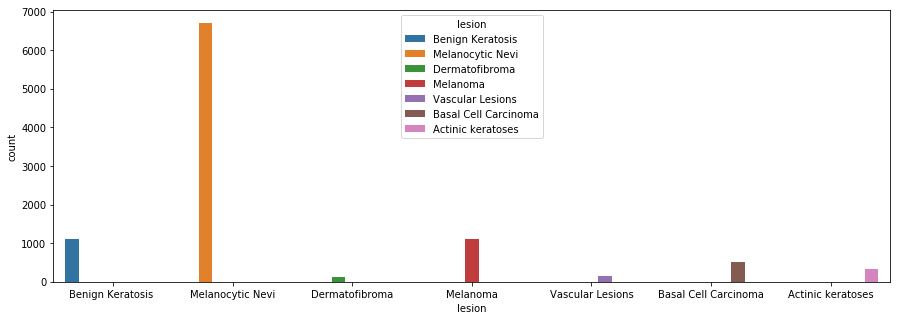

In [67]:
fig, ax1 = plt.subplots(1, 1, figsize = (15, 5))
sns.countplot(x='lesion',data=df, hue="lesion",ax=ax1)

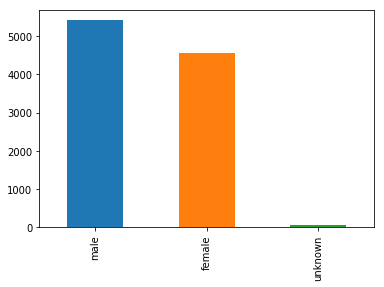

In [68]:
#  Plotting the distribution by gender
# Skin Cancer is mostly common in men
df['sex'].value_counts().plot(kind='bar')

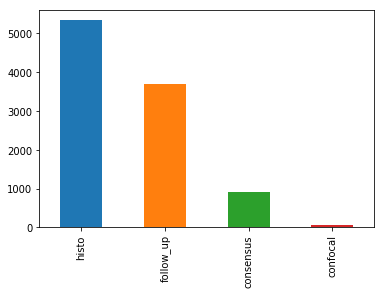

In [69]:
df['dx_type'].value_counts().plot(kind='bar')

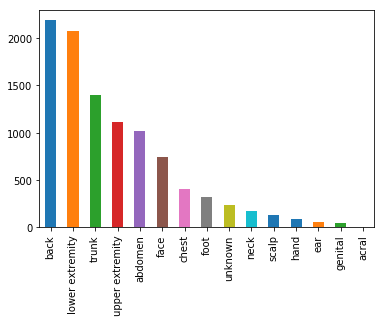

In [70]:
# plotting the distribution by localization 
# Back, Lower extremity and trunk are the main areas of skin cancer
df['localization'].value_counts().plot(kind='bar')

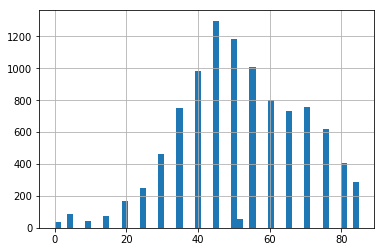

In [71]:
# Plotting  the distribution by person ages
# Larger number of patients suffering from skin cancer are from 40 to 60
df['age'].hist(bins=50)

In [5]:
base_dir = 'base_dir'
os.mkdir(base_dir)

In [6]:
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

In [7]:
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [8]:
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [10]:
df_data = pd.read_csv('D:/Ritika Agarwal/Hackathons/Kaggle/input/HAM10000_metadata.csv')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [11]:
df = df_data.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [12]:
def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [13]:
df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [14]:
# Filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

df.shape

(5514, 8)

In [17]:
y = df['dx']

_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

df_val.shape

(938, 8)

In [18]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [19]:
# Create a training dataset that excludes the images that are present in the val set
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']

print(len(df_train))
print(len(df_val))

9077
938


In [20]:
df_train['dx'].value_counts()

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [21]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [22]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [ ]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('D:/Ritika Agarwal/Hackathons/Kaggle/input/ham10000_images_part_1')
folder_2 = os.listdir('D:/Ritika Agarwal/Hackathons/Kaggle/input/ham10000_images_part_2')
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

In [24]:
# Transfer the train images
for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('D:/Ritika Agarwal/Hackathons/Kaggle/input/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('D:/Ritika Agarwal/Hackathons/Kaggle/input/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the validation images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('D:/Ritika Agarwal/Hackathons/Kaggle/input/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('D:/Ritika Agarwal/Hackathons/Kaggle/input/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [25]:
# check number of images in each folder in training dataset
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
1074
1024
484
301
131
109


In [26]:
# check number of images in each folder in validation dataset
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


In [32]:
# note that we are not augmenting class 'nv'.Since nv have sufficient number of images.
class_list = ['mel','bkl','bcc','akiec','vasc','df']
for item in class_list:
    # create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)
    # Choose a class
    img_class = item
    # List all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,save_to_dir=save_path,save_format='jpg',target_size=(224,224),
                                                    batch_size=batch_size)


    # Generate the augmented images and add them to the training folders
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')


Found 1074 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Found 484 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 131 images belonging to 1 classes.
Found 109 images belonging to 1 classes.


In [34]:
# Check how many train images in each folder.
# This is the original images plus the augmented images.

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
5920
5920
5858
5217
5290
4410


In [35]:
# Check how many val images in each folder.

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


In [37]:
df_data.shape

(10015, 8)

In [38]:
df_data.head()

,lesion_id,dx,dx_type,age,sex,localization,duplicates,train_or_val
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,has_duplicates,train
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,has_duplicates,train
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,has_duplicates,train
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,has_duplicates,train
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,has_duplicates,train


In [47]:
path= Path('D:/Ritika Agarwal/Hackathons/Kaggle/input/base_dir/')

df_tfms is transformations which we will be applying to images on the fly. It will transforms all the image sizes is
224 X 224 since on those sizes our architecture resnet34 has been trained on. Also, all the images get centered, 
cropped and zoomed a little bit by transformation functions.
 Pixel values of images range from 0 to 255. Images generally contain 3 color channels (Red, Green, and Blue). Sometimes some channels will be 
bright, some might be dull. Some might vary so much and some might not vary at all. It really helps to train a model
if all those 3 channels have got pixel values with a mean of 0 and a standard deviation of 1.
Normalization simply does that.

In [53]:
tfms = get_transforms(flip_vert=True,max_lighting=0.3, max_zoom=1.05,max_warp=0.)
data2 = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,test='test',ds_tfms=tfms, size=224,bs=16,padding_mode='zeros', num_workers=1).normalize(imagenet_stats)

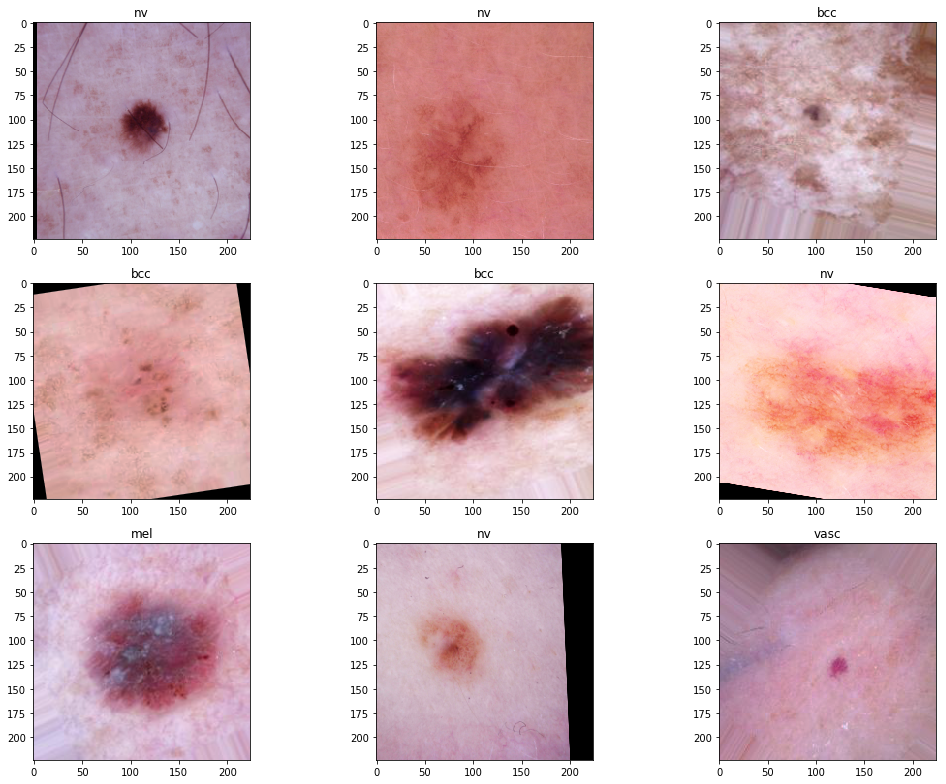

In [54]:
data2.show_batch(rows=3, figsize=(15,11), hide_axis=False)

In [55]:
# Sort and Show classes
#  To check the total number of classes by
print('Classes: ',data2.classes)
print('len: ',len(data2.classes),data2.c)

Classes:  ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
len:  7 7


In [56]:
train_path = path/'train'
print('Training Data folders: ',len(train_path.ls()))

Training Data folders:  7


In [57]:
test_path = path/'val'
print('Test set files count: ', len(test_path.ls()))

Test set files count:  7


create_cnn method resides in fastai.vision.learner class.In fastai, the model is trained by a learner, create_cnn 
takes few parameters, first the DataBunch data object, then model resnet34, the last thing to pass is the list of metrics.
When you call create_cnn first time, it downloads resnet34 pre-trained weights.
Pre-trained means this particular model has been already trained for the particular task, and that task is it is been 
trained on 1 and half million pictures of 1000 different categories of objects like plants, animals, people, cars etc. 
So we don’t necessarily start with a model that knows nothing about images, but we start with knowledge of images of 1000 categories.

In [63]:
# To create a RESNET 34 with pretrained weights
learn = create_cnn(data2, models.resnet34, metrics=error_rate)

fit_one_cycle method fits a model following one cycle policy.It accepts cycle_len which is an integer describing how 
many times you want to pass through the complete dataset. Each time model sees a picture, it keeps getting better.
Training means creating a set of weights. it.e, finding a set of coefficients in case of linear or logistic regression.
Searching parameters that fit well to the data.

In [64]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.953072,0.717392,0.276421
2,0.726894,0.513885,0.195292
3,0.588074,0.403265,0.149222
4,0.518864,0.356038,0.126187
5,0.522794,0.346448,0.127073


This will save the model as .pth format.Models will get saved into your local dir in /models folder
Since different model’s weights should be saved separately.

In [65]:
learn.save('stage1-skinresnet34')

This class has methods for creating confusion matrix as well as plotting misclassified images

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

Loss function tells you how good was your prediction compared to ground truth.
interp.plot_top_losses will show images in `top_losses` along with their prediction, actual, loss, and probability of predicted class.

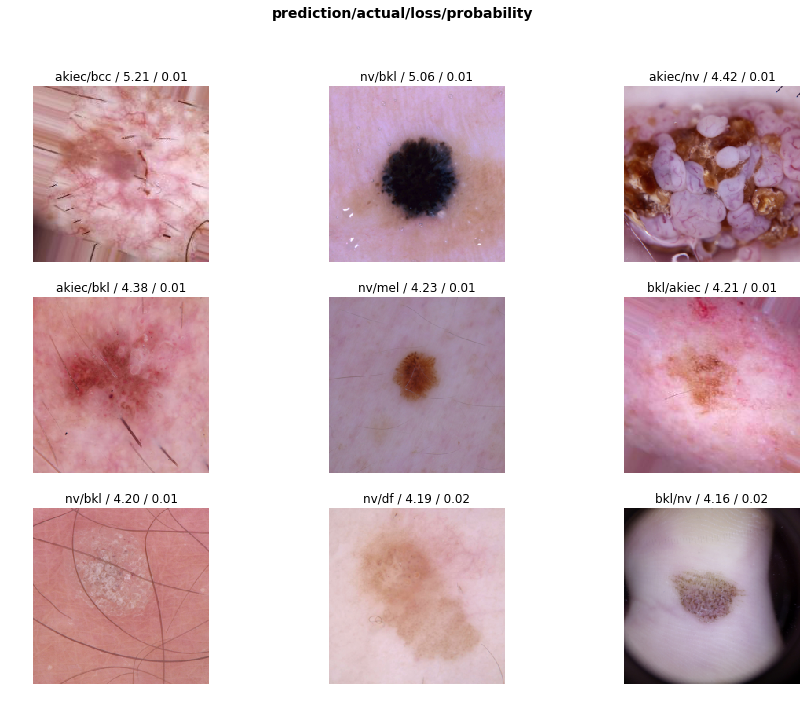

In [67]:
interp.plot_top_losses(9, figsize=(15,11))

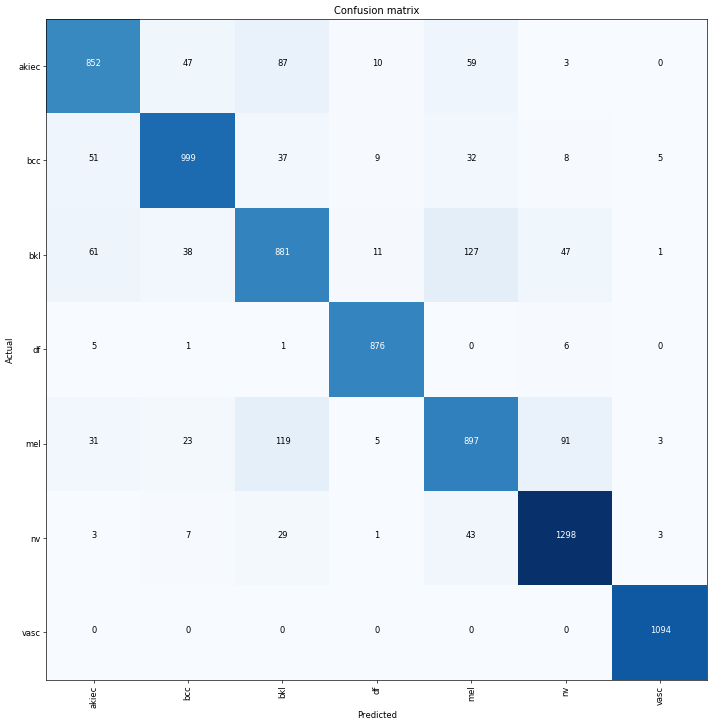

In [68]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

most_confused() function will simply grab out of the confusion matrix the most confused combinations of predicted 
and actual categories, that it got wrong most often.


In [69]:
interp.most_confused(min_val=2)

[('bkl', 'mel', 127),
 ('mel', 'bkl', 119),
 ('mel', 'nv', 91),
 ('akiec', 'bkl', 87),
 ('bkl', 'akiec', 61),
 ('akiec', 'mel', 59),
 ('bcc', 'akiec', 51),
 ('akiec', 'bcc', 47),
 ('bkl', 'nv', 47),
 ('nv', 'mel', 43),
 ('bkl', 'bcc', 38),
 ('bcc', 'bkl', 37),
 ('bcc', 'mel', 32),
 ('mel', 'akiec', 31),
 ('nv', 'bkl', 29),
 ('mel', 'bcc', 23),
 ('bkl', 'df', 11),
 ('akiec', 'df', 10),
 ('bcc', 'df', 9),
 ('bcc', 'nv', 8),
 ('nv', 'bcc', 7),
 ('df', 'nv', 6),
 ('bcc', 'vasc', 5),
 ('df', 'akiec', 5),
 ('mel', 'df', 5),
 ('akiec', 'nv', 3),
 ('mel', 'vasc', 3),
 ('nv', 'akiec', 3),
 ('nv', 'vasc', 3)]

fit_one_cycle() on a create_cnn, it will just fine tune these extra layers at the end, and run very fast. 

unfreeze()will train the whole model.

In [70]:
learn.unfreeze()

In [71]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.496123,0.356882,0.130237


In [72]:
learn.load('stage1-skinresnet34');

In [73]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


This will plot the result of our LR finder and what this basically shows you is the key parameter called a learning rate
The learning rate basically says how quickly are we updating the parameters in our model. The x-axis one here shows me
what happens as I increase the learning rate. The y-axis shows what the loss is. 

So you can see, once the learning rate gets passed 1e-04, our loss gets worse.So you can see why our loss got worse. 
Because we are trying to fine-tune things now, we can’t use such a high learning rate. So based on the learning rate 
finder, we tried to pick something well before it started getting worse.


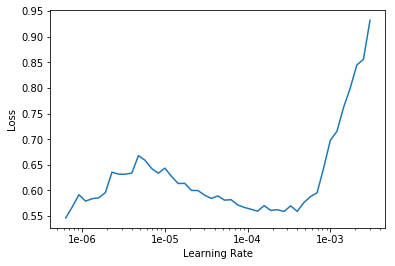

In [74]:
learn.recorder.plot()

slice function in Python  will  take a start value and a stop value and basically what this says is train the very first 
layers at a learning rate of 1e-5, and the very last layers at a rate of 1e-4, and distribute all the other layers 
across that between those two values equally.

In [75]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.459214,0.339768,0.129984
2,0.349035,0.235113,0.087710
3,0.294652,0.169130,0.057461
4,0.226487,0.142351,0.050500
5,0.181910,0.127529,0.045944


In [121]:
accuracy=1-0.045944

In [122]:
print(accuracy)

0.954056


In [76]:
learn.save('stages2kinresnet34')

In [89]:
learn.load('stages2kinresnet34')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (31606 items)
[Category akiec, Category akiec, Category akiec, Category akiec, Category akiec]...
Path: D:\Ritika Agarwal\Hackathons\Kaggle\input\base_dir
x: ImageItemList (31606 items)
[Image (3, 450, 600), Image (3, 450, 600), Image (3, 450, 600), Image (3, 450, 600), Image (3, 450, 600)]...
Path: D:\Ritika Agarwal\Hackathons\Kaggle\input\base_dir;

Valid: LabelList
y: CategoryList (7901 items)
[Category bcc, Category akiec, Category bcc, Category mel, Category akiec]...
Path: D:\Ritika Agarwal\Hackathons\Kaggle\input\base_dir
x: ImageItemList (7901 items)
[Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224)]...
Path: D:\Ritika Agarwal\Hackathons\Kaggle\input\base_dir;

Test: LabelList
y: EmptyLabelList (0 items)
[]...
Path: .
x: ImageItemList (0 items)
[]...
Path: D:\Ritika Agarwal\Hackathons\Kaggle\input\base_dir, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3,

In [90]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [16, 64, 112, 112]   9408       True      
______________________________________________________________________
BatchNorm2d          [16, 64, 112, 112]   128        True      
______________________________________________________________________
ReLU                 [16, 64, 112, 112]   0          False     
______________________________________________________________________
MaxPool2d            [16, 64, 56, 56]     0          False     
______________________________________________________________________
Conv2d               [16, 64, 56, 56]     36864      True      
______________________________________________________________________
BatchNorm2d          [16, 64, 56, 56]     128        True      
______________________________________________________________________
ReLU                 [16, 64, 56, 56]     0          False     
______________________________________________________________

In [19]:
import os
from PIL import Image
path1= Path('D:/Ritika Agarwal/Hackathons/Kaggle/input/base_dir/test/')

In [21]:
images = [f for f in os.listdir(path1) if os.path.splitext(f)[-1] == '.jpg']

In [22]:
print(images)

['ISIC_0024326.jpg', 'ISIC_0024327.jpg', 'ISIC_0024332.jpg', 'ISIC_0024334.jpg', 'ISIC_0024354.jpg', 'ISIC_0024364.jpg', 'ISIC_0024383.jpg', 'ISIC_0024389.jpg', 'ISIC_0024393.jpg', 'ISIC_0024399.jpg', 'ISIC_0024424.jpg', 'ISIC_0024436.jpg', 'ISIC_0024457.jpg', 'ISIC_0024462.jpg', 'ISIC_0024464.jpg', 'ISIC_0024478.jpg', 'ISIC_0024480.jpg', 'ISIC_0024487.jpg', 'ISIC_0024492.jpg', 'ISIC_0024502.jpg', 'ISIC_0024506.jpg', 'ISIC_0024517.jpg', 'ISIC_0024518.jpg', 'ISIC_0024521.jpg', 'ISIC_0024528.jpg', 'ISIC_0024542.jpg', 'ISIC_0024558.jpg', 'ISIC_0024569.jpg', 'ISIC_0024580.jpg', 'ISIC_0024583.jpg', 'ISIC_0024585.jpg', 'ISIC_0024602.jpg', 'ISIC_0024616.jpg', 'ISIC_0024619.jpg', 'ISIC_0024625.jpg', 'ISIC_0024651.jpg', 'ISIC_0024659.jpg', 'ISIC_0024670.jpg', 'ISIC_0024693.jpg', 'ISIC_0024706.jpg', 'ISIC_0024707.jpg', 'ISIC_0024717.jpg', 'ISIC_0024726.jpg', 'ISIC_0024742.jpg', 'ISIC_0024750.jpg', 'ISIC_0024769.jpg', 'ISIC_0024776.jpg', 'ISIC_0024783.jpg', 'ISIC_0024786.jpg', 'ISIC_0024796.jpg',

In [24]:
image_df=pd.DataFrame(images)

In [26]:
# creating a new column category
image_df['category'] = image_df.apply(lambda _: '', axis=1)

In [29]:
image_df.columns

Index([0, 'category'], dtype='object')

In [32]:
image_df.rename(columns={0: 'img_name', 'img_category': 'image_category'}, inplace=True)

In [91]:
filename='D:/Ritika Agarwal/Hackathons/Kaggle/input/base_dir/test/ISIC_0024580.jpg'

In [92]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category nv

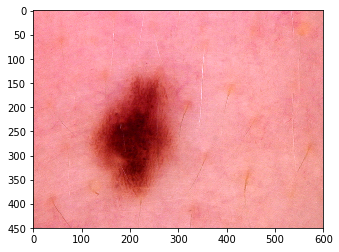

In [93]:
import matplotlib.image as mpimg
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# predicting the images from test folder
imagepreds = []
fileids = []
for file in os.listdir('D:/Ritika Agarwal/Hackathons/Kaggle/input/base_dir/test/'):
    filename = os.path.join('D:/Ritika Agarwal/Hackathons/Kaggle/input/base_dir/test/', file)
    imgtest = open_image(filename)
    predictionarray = learn.predict(imgtest)
    file
    str(predictionarray[0])
    fileids.append(file)
    imagepreds.append(str(predictionarray[0]))
predict_df = pd.DataFrame({'img_name':fileids, 'image_category':imagepreds})
predict_df.to_csv('D:/Ritika Agarwal/Hackathons/Kaggle/input/output_submission.csv', index=False)

In [125]:
predict_df.head(11)

,image_category,img_name
0,nv,ISIC_0024326.jpg
1,nv,ISIC_0024327.jpg
2,bcc,ISIC_0024332.jpg
3,nv,ISIC_0024334.jpg
4,nv,ISIC_0024354.jpg
5,nv,ISIC_0024364.jpg
6,bkl,ISIC_0024383.jpg
7,nv,ISIC_0024389.jpg
8,nv,ISIC_0024393.jpg
9,nv,ISIC_0024399.jpg
